In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


## Loading data

In [2]:
df = pd.read_csv('Fraud.csv')  #uploading the dataset

In [3]:
df.head()   #Visual representation of how to dataset is

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

#### Dataset have

Records: 6362620 and Features: 11

In [5]:
df.info()  #Column info and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


The DataFrame contains 11 columns.

-  3 columns have int64 data type.
-  5 columns have float64 data type.
-  3 columns have object data type.

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


- It provide statistical analysis of data.
- It give count,mean,max,standarad deviation

### find null values of columns

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### No null values are present in data.

In [8]:
col_obj = df.select_dtypes(include=object).columns
col_obj  

#understanding object datatype column in given dataset

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [9]:
for col in col_obj:
    print(col,':')
    print('Number of unique values in ',col,' ',df[col].nunique())
    print(df[col].unique())
    print('-'*20)

type :
Number of unique values in  type   5
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
--------------------
nameOrig :
Number of unique values in  nameOrig   6353307
['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']
--------------------
nameDest :
Number of unique values in  nameDest   2722362
['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']
--------------------


Lets understand 'type' column

In [10]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

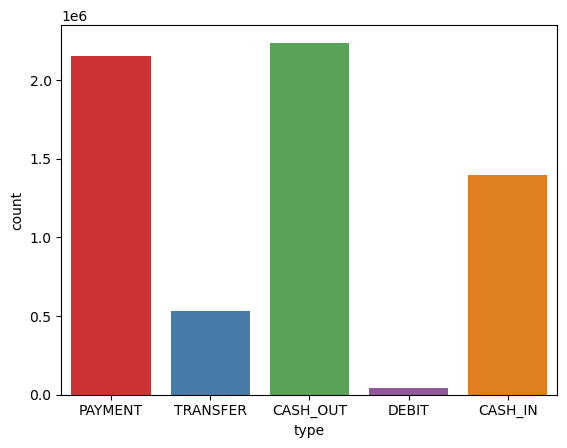

In [11]:
sns.countplot(x=df['type'],palette='Set1')

### Visual representation of Type coulmn with individual counts of different types

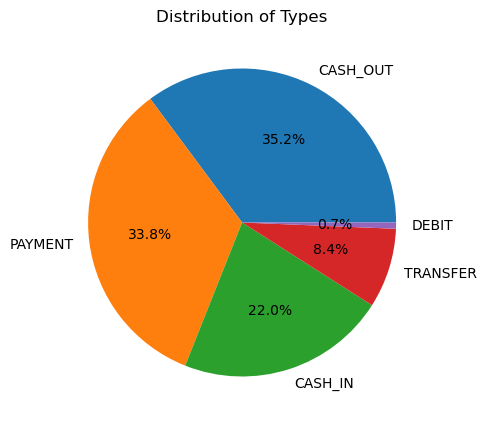

In [12]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(5, 5)) 
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Types')
plt.show()

- Above plot we can infer that high percentage of data is there for pyment and cash_out type.
- There is very less data for transaction type debit.

## Outlier detection

In [13]:
col_num =  df.select_dtypes(exclude=object).columns
col_num

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

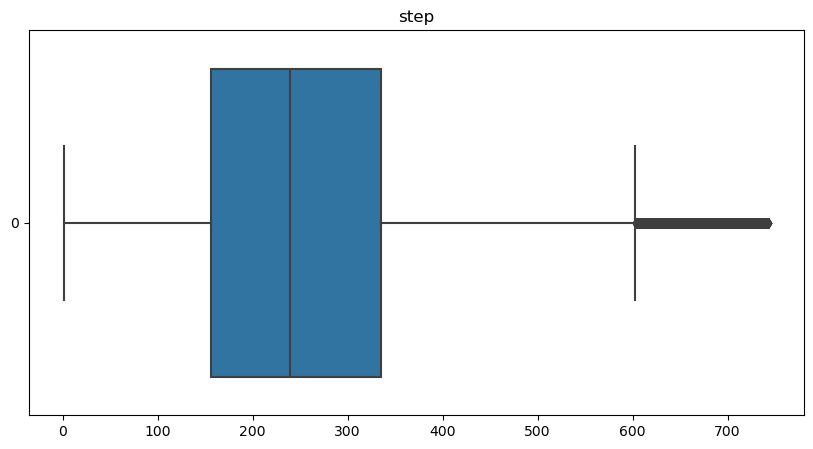

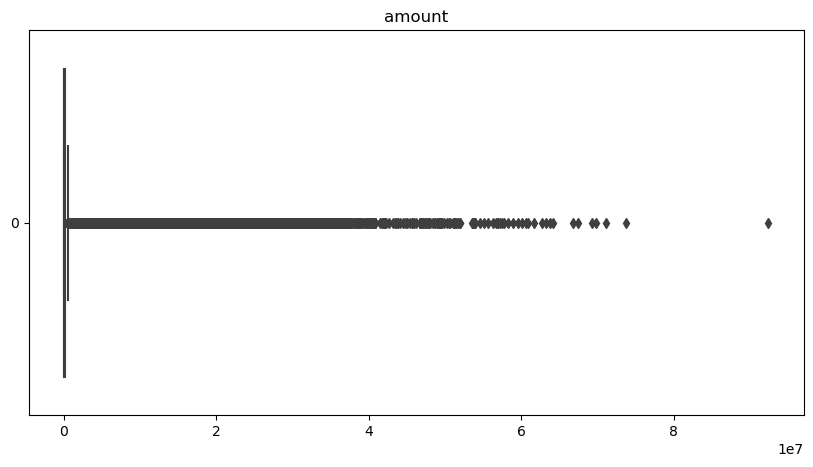

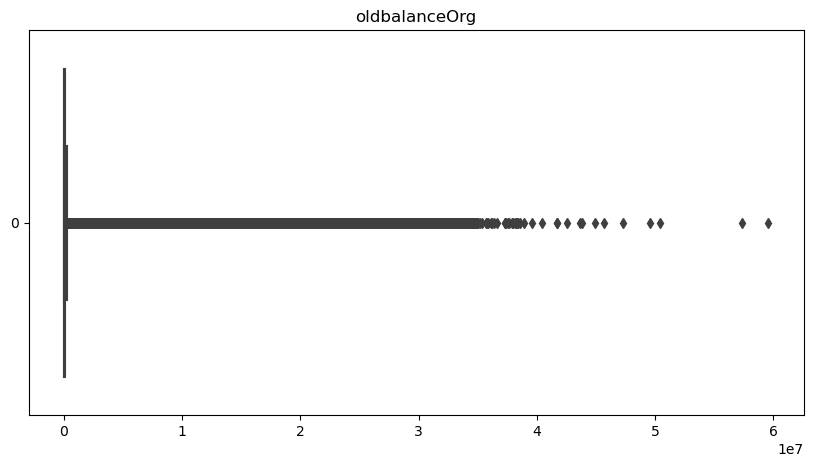

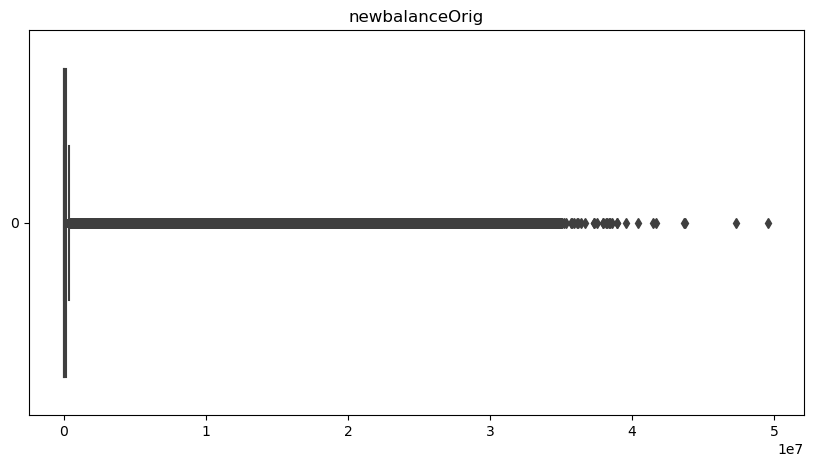

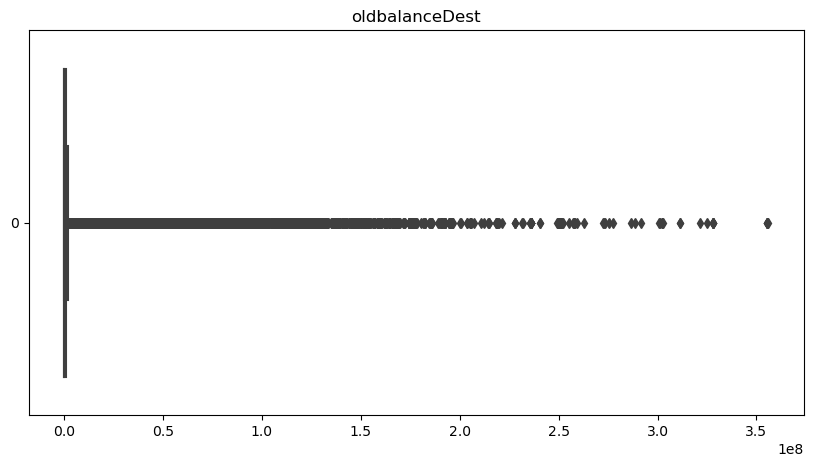

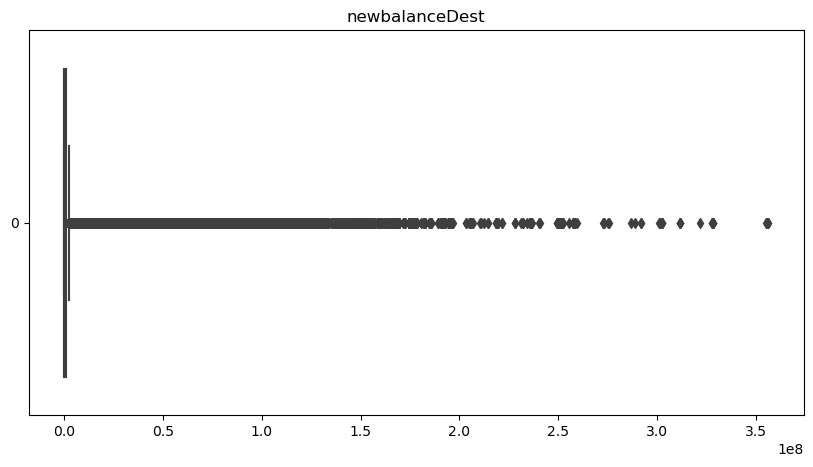

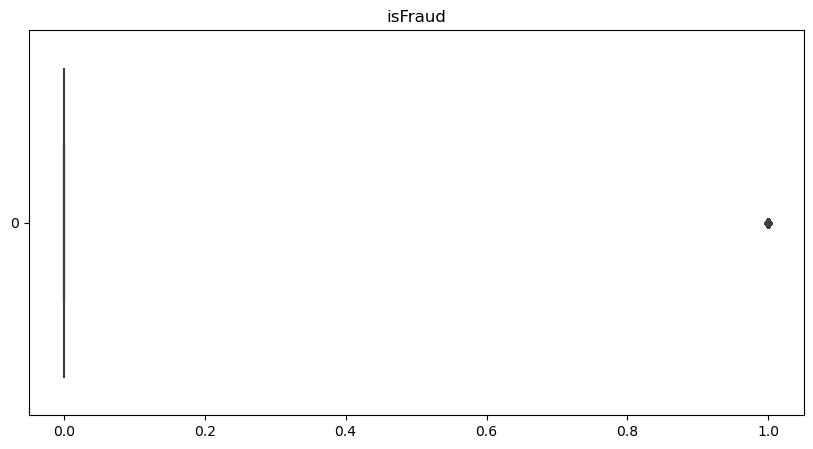

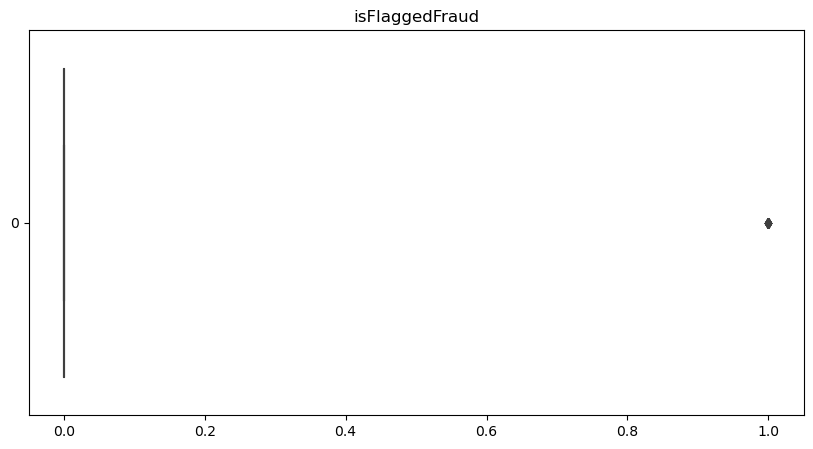

In [14]:
for col in col_num:
    plt.figure(figsize=(10,5))
    plt.title(col)
    sns.boxplot(df[col],orient='h')
    plt.show()

##### From the above graph it can be concluded that Outlier are present in all columns and visually it can be infered that if we remove all outlier than majoirty of data will be deleted and could give bias result

### Lets understand target column

In [15]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

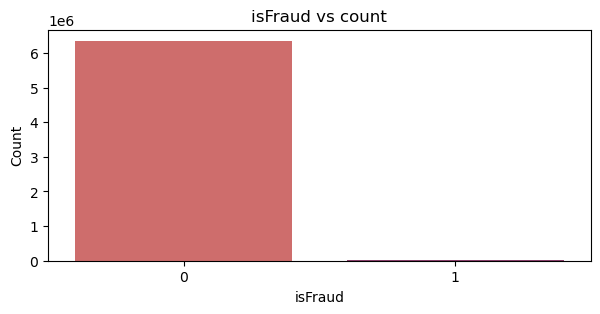

In [16]:
# Countplot of 'isFraud'
plt.figure(figsize=(7,3))
plt.title('isFraud vs count')
sns.countplot(data=df,x='isFraud',palette='flare')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

In [17]:
# Let's look at the percentage of each category in isFraud column(target column)
print("No Frauds:",df['isFraud'].value_counts()[0]/len(df['isFraud'])*100)
print("Frauds:",df['isFraud'].value_counts()[1]/len(df['isFraud'])*100)

No Frauds: 99.87091795518198
Frauds: 0.12908204481801522


- From above we can infer that data is highly imbalanced.
- 99 percent of data is of No fraud categorya.
- Ratio of records is 99:1 of No-fraud with fraud

In [18]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Fraud transaction as per different type

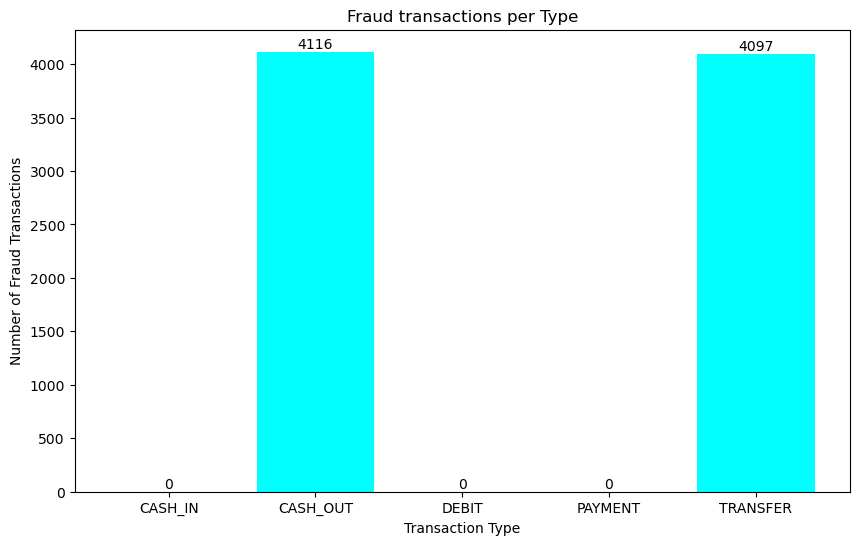

In [19]:
fraud_trans_type = df.groupby('type')['isFraud'].sum().reset_index()

#Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(fraud_trans_type['type'], fraud_trans_type['isFraud'], color='cyan')

#Adding labels and titles
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraud Transactions')
plt.title('Fraud transactions per Type')
for index, value in enumerate(fraud_trans_type['isFraud']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()


In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [21]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

### Label Encoding column type

In [22]:
from sklearn.preprocessing import LabelEncoder

df['type'] = LabelEncoder().fit_transform(df['type'])

### MULTICOLINEARITY

<Axes: >

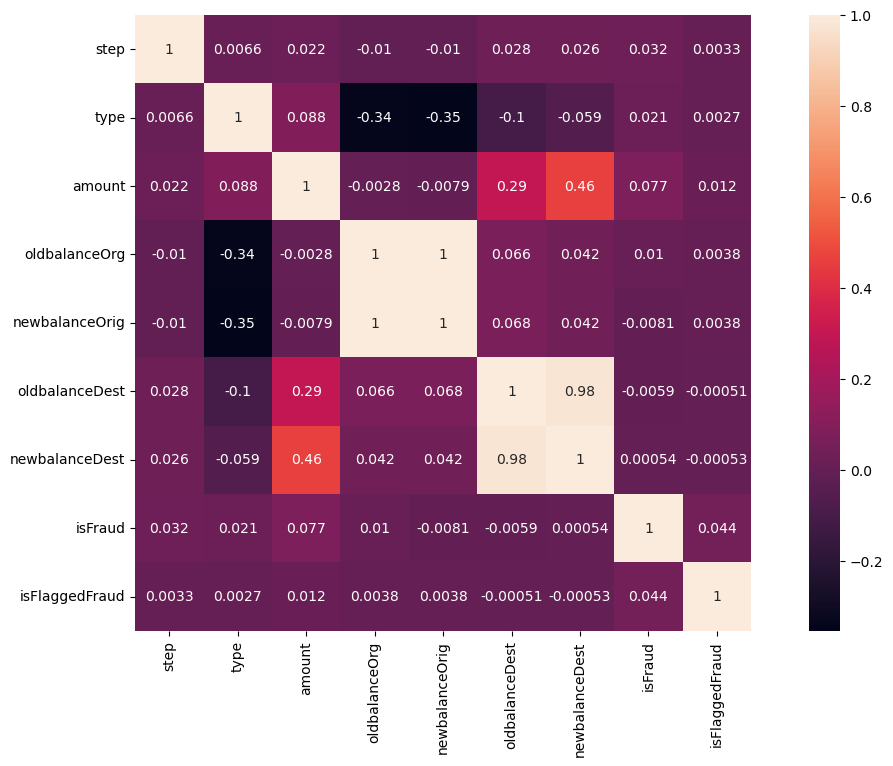

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,square=True)

#find the correlation between columns

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print('Variance Inflation Factor')
for i in range(df.shape[1]):
    print(df.columns[i]," : ",end=' ')
    print(variance_inflation_factor(df.values,i))

Variance Inflation Factor
step  :  2.250165911116426
type  :  2.085347534546198
amount  :  4.083183557325773
oldbalanceOrg  :  564.4392937717903
newbalanceOrig  :  568.748454118756
oldbalanceDest  :  73.12767121326486
newbalanceDest  :  84.82046715938228
isFraud  :  1.1941601835290423
isFlaggedFraud  :  1.002564520371817


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest.

In [25]:
df['Actual_amount_orig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['Actual_amount_dest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)

# We cannot drop these coulmn with high VIF. 
#Therefore, here we are calculating old balance of sender and receiver to reduce VIF factor.  


In [26]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0,181.00,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0,181.00,21182.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14,0.0


In [27]:
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1,inplace=True)

In [28]:
print('Variance Inflation Factor')
for i in range(df.shape[1]):
    print(df.columns[i]," : ",end=' ')
    print(variance_inflation_factor(df.values,i))

Variance Inflation Factor
step  :  2.089916143614993
type  :  2.0393283173745393
amount  :  3.8833826140179895
isFraud  :  1.187909482938849
isFlaggedFraud  :  1.0025351175865198
Actual_amount_orig  :  1.2933061926835894
Actual_amount_dest  :  3.774030046634711


<Axes: >

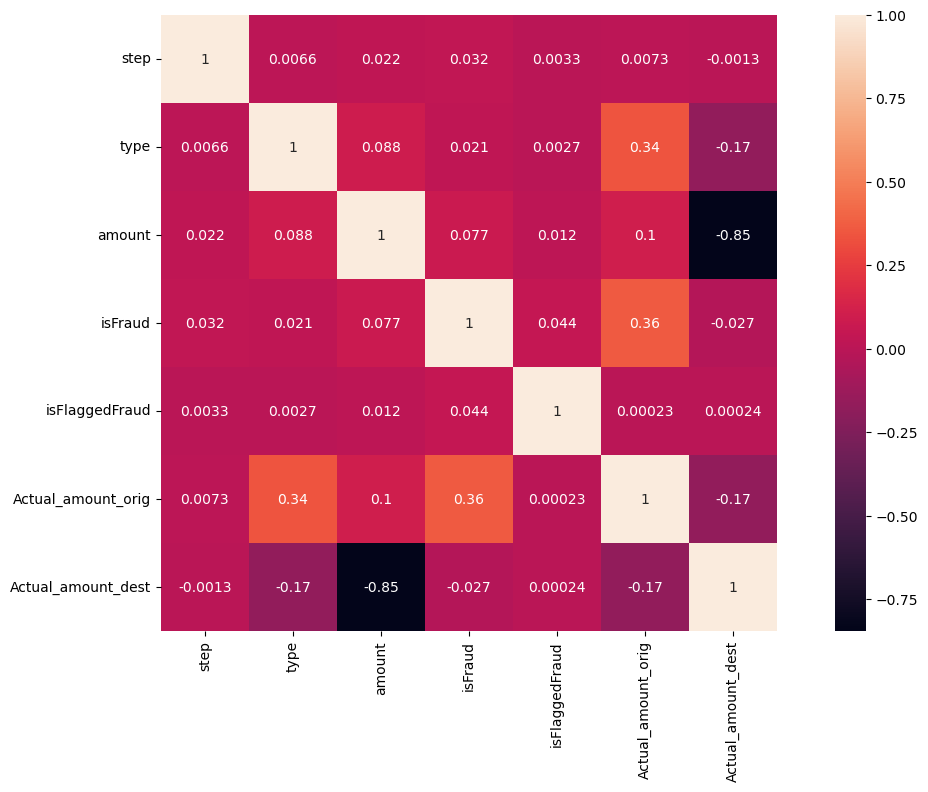

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,square=True)

In [30]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [31]:
# 
x = df.drop('isFraud',axis=1)
y = df['isFraud']

In [32]:
x

,step,type,amount,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest
0,1,3,9839.64,0,9839.64,0.00
1,1,3,1864.28,0,1864.28,0.00
2,1,4,181.00,0,181.00,0.00
3,1,1,181.00,0,181.00,21182.00
4,1,3,11668.14,0,11668.14,0.00
...,...,...,...,...,...,...
6362615,743,1,339682.13,0,339682.13,-339682.13
6362616,743,4,6311409.28,0,6311409.28,0.00
6362617,743,1,6311409.28,0,6311409.28,-6311409.27
6362618,743,4,850002.52,0,850002.52,0.00


In [33]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

## Split data into training and testing

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

As we can see above, we need to normalize the range of features in a dataset before applying any machine learning algorithm on them.
As we have outliers in our dataset we will go for Robust Scaler as it is less prone to outliers.
As robust Scaler works with median and Inter quartile range 

In [35]:
from sklearn.preprocessing import RobustScaler

re=RobustScaler()

x_train = re.fit_transform(x_train)
x_test  = re.transform(x_test)

In [36]:
acc_score={}

## Model Building 

In [37]:
# Model building Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
mod4 = lr.fit(x_train,y_train)
y_predl = mod4.predict(x_test)

# Model Testing
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predl))
print()
print("Accuracy Score")
print(accuracy_score(y_test,y_predl))
print()
print("Classification Report")
print(classification_report(y_test,y_predl))
print()
acc_score['Logistic Regression'] = accuracy_score(y_test,y_predl)*100

Confusion Matrix
[[1270777     106]
 [    884     757]]

Accuracy Score
0.9992220186023997

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.88      0.46      0.60      1641

    accuracy                           1.00   1272524
   macro avg       0.94      0.73      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524




In [38]:
# Model building Decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',random_state=0)
mod1 = dtree.fit(x_train,y_train)
y_predd = mod1.predict(x_test)

# Model Testing
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predd))
print()
print("Accuracy Score")
print(accuracy_score(y_test,y_predd))
print()
print("Classification Report")
print(classification_report(y_test,y_predd))
print()
acc_score['DTree'] = accuracy_score(y_test,y_predd)*100

Confusion Matrix
[[1270546     337]
 [    344    1297]]

Accuracy Score
0.9994648430992265

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.79      0.79      0.79      1641

    accuracy                           1.00   1272524
   macro avg       0.90      0.90      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524




In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,criterion="entropy")
mod2 = rf.fit(x_train,y_train)
y_predrf = mod2.predict(x_test)

# Model Testing
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predrf))
print()
print("Accuracy Score")
print(accuracy_score(y_test,y_predrf))
print()
print("Classification Report")
print(classification_report(y_test,y_predrf))
print()
acc_score['RandomForest'] = accuracy_score(y_test,y_predrf)*100

Confusion Matrix
[[1270806      77]
 [    381    1260]]

Accuracy Score
0.9996400853736354

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.94      0.77      0.85      1641

    accuracy                           1.00   1272524
   macro avg       0.97      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524




In [40]:
# Model building KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
mod3 = knn.fit(x_train,y_train)
y_predk = mod3.predict(x_test)

# Model Testing
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predk))
print()
print("Accuracy Score")
print(accuracy_score(y_test,y_predk))
print()
print("Classification Report")
print(classification_report(y_test,y_predk))
print()
acc_score['KNN'] = accuracy_score(y_test,y_predk)*100

Confusion Matrix
[[1270735     148]
 [    482    1159]]

Accuracy Score
0.9995049209287997

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.89      0.71      0.79      1641

    accuracy                           1.00   1272524
   macro avg       0.94      0.85      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524




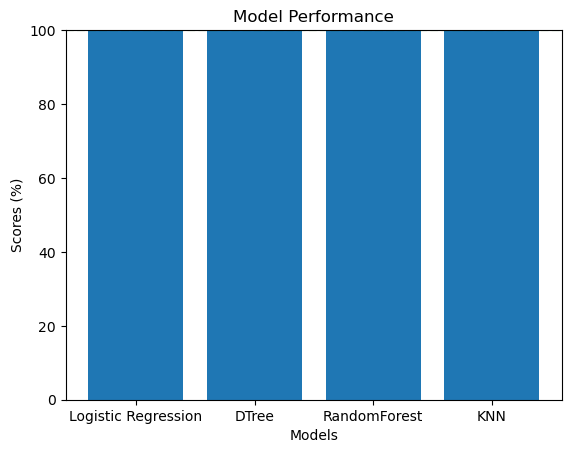

In [41]:
plt.bar(acc_score.keys(),acc_score.values())
plt.xlabel('Models')
plt.ylabel('Scores (%)')
plt.ylim(0,100)
plt.axhline(acc_score['Logistic Regression'], ls='--', color='green')
plt.title('Model Performance')
plt.show()

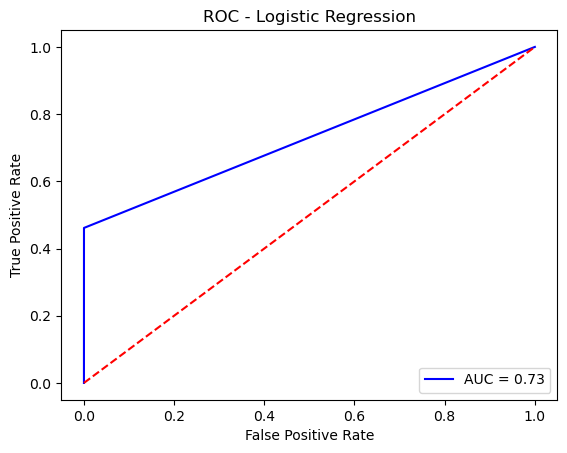

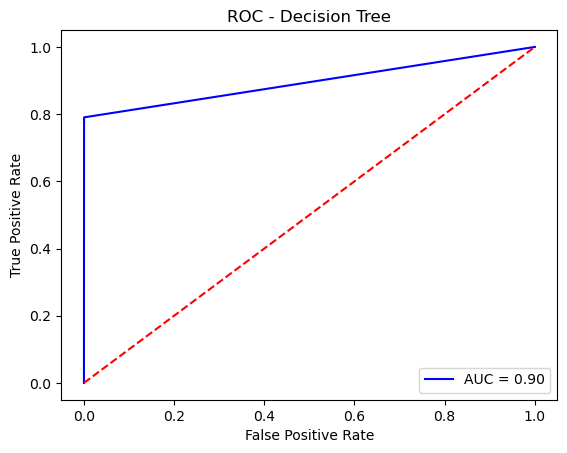

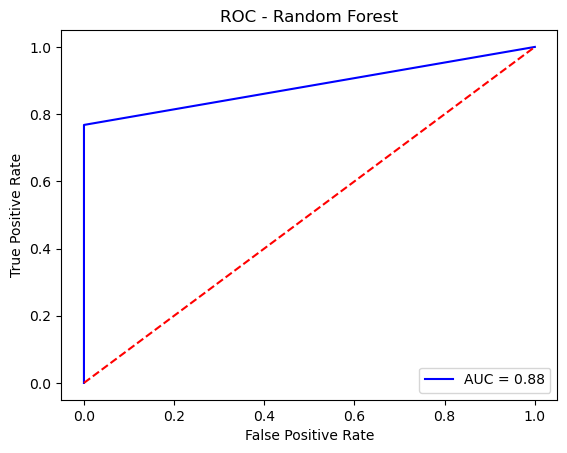

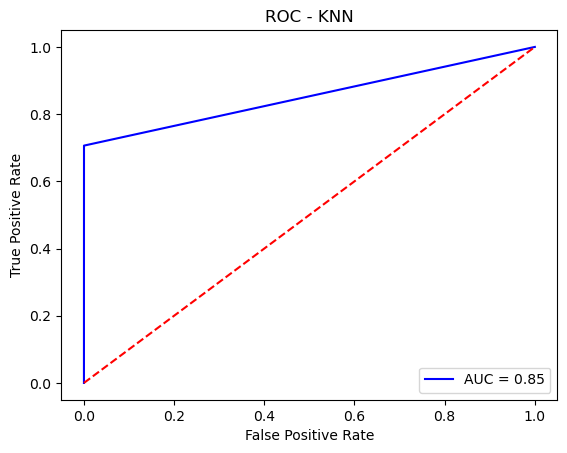

In [43]:
# AUC ROC - Logistic Regression
# calculate the fpr and tpr for all thresholds of the classification
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test,y_predl)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test,y_predd)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test,y_predrf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - KNN
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test,y_predk)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

                
    

In [44]:
from sklearn.metrics import precision_score

y_predl_precision = precision_score(y_test,y_predl)
print(y_predl_precision)

y_predd_precision = precision_score(y_test,y_predd)
print(y_predd_precision)

y_predrf_precision = precision_score(y_test,y_predrf)
print(y_predrf_precision)

y_predk_precision = precision_score(y_test,y_predk)
print(y_predk_precision)



0.8771726535341831
0.7937576499388005
0.9424083769633508
0.8867635807192042


<BarContainer object of 4 artists>

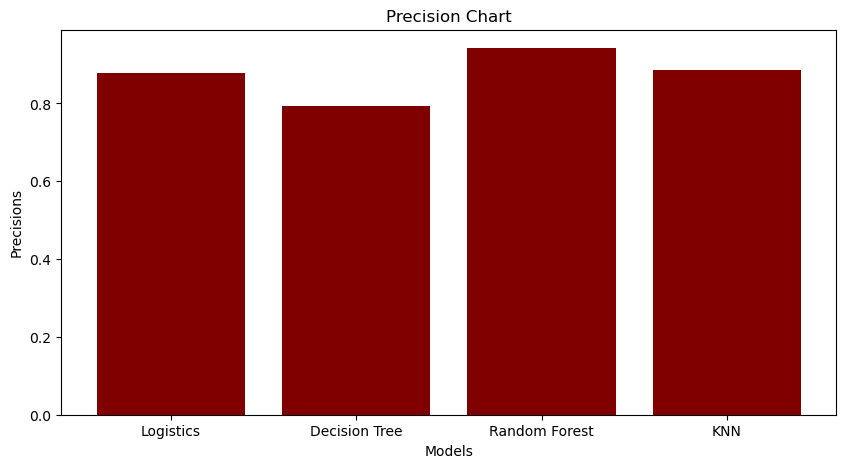

In [45]:
precision_data={"Logistics":y_predl_precision,"Decision Tree":y_predd_precision,
"Random Forest":y_predrf_precision,
"KNN":y_predk_precision,
}

mod = list(precision_data.keys())
val = list(precision_data.values())

fig = plt.figure(figsize = (10, 5))
plt.title("Precision Chart")
plt.xlabel('Models')
plt.ylabel('Precisions')
plt.bar(mod, val, color ='maroon')

# Observations

After observing the results, we found that Decision Tree,Random Forest, KNN models have equal accuracy. However, Random Forest exhibits higher precision. In a fraud detection model, precision holds significant importance. The primary objective is to correctly predict fraud transactions while minimizing false positives for genuine transactions. Failing to achieve both these goals could lead to innocent customers being wrongly framed as culprits and guilty customers escaping detection.

This is one of the key reasons why Random Forest and is preferred over other alternatives in such scenarios.


## Suggestion to Client

### Prevention Measures to take by customers

1. Browse only on secured websites.

2. Download any applications from official app stores.

3. Use secured internet connections and avoid doing any banking transaction on public/free networks.

4. Keep your mobile and laptop security updated.

5. Don't respond to unsolicited calls/SMS/E-mails.

6. If customer feel like that they have been tricked or security compromised, contact bank at earliest.
